# Hypothesis Testing

In this notebook; A few hypothesis testing will be performed to check the findings observed in the EDA notebook are statistically significant or not.

**Objectives to be tested**

* Are medical claims made by smokers greater than those who don't smoke ?
* Is the BMI of females lower than the BMI of males?
* Is the proportion of smokers significantly different in different genders?
* Is the distribution of BMI in across different regions are the same? 

Hypothesis testing will be performed by following the steps below, respectively.

**1.** State the null hypothesis and alternative hypothesis

**2.** Decide the type of hypothesis testing

**3.**  Check the assumptions

**4.**  Perform hyptohesis testing 

**5.** Interpret results

**Notes :**

* Whether the assumptions are met will be checked by visualization techniques or hypothesis testing. If not met, the appropriate non-parametric tests will be used.

* The hypothesis test results will be interpreted with a p-value instead of test statistics.



# Import Libraries

In [202]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [203]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Are medical claims made by smokers greater than those who don't smoke ?

In [208]:
# get charges of smoker claimant
smoker_charges = df[df['smoker']=='yes']['charges']
smoker_charges.reset_index(drop=True, inplace=True)

# get charges of non-smoker claimant
non_smoker_charges = df[df['smoker']=='no']['charges']
non_smoker_charges.reset_index(drop=True, inplace=True)

C:\Users\merve\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


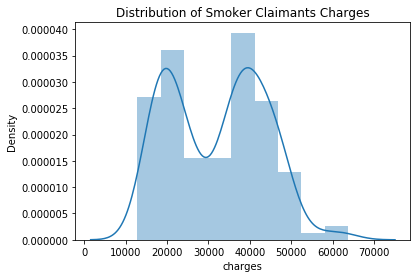

In [209]:
plt.title('Distribution of Smoker Claimants Charges')
sns.distplot(smoker_charges)
plt.show()

C:\Users\merve\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


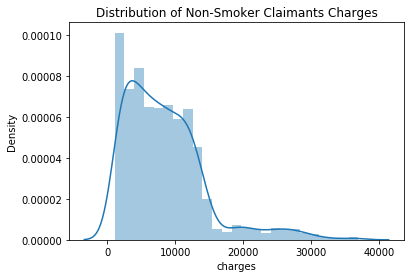

In [210]:
plt.title('Distribution of Non-Smoker Claimants Charges')
sns.distplot(non_smoker_charges)
plt.show()

### 1.State the null hypothesis and alternative hypothesis
H0 :  μs  <= μns

HA :  μs  >  μns

alpha(α) = 0.05

confidence_level = %95 (1-α)
 
μs --> mean of the charge for smoker claimant in the dataset.

μns --> mean of the charge for non-smoker claimant in the dataset.

### 2. Decide the type of hypothesis testing

Since there are two independent groups and it is desired to compare the means of these two groups, **two-sample t test** will be used.

To decide whether to use parametric or non-parametric tests, it will be examined whether the assumptions of the two-sample t-test are met.

### 3. Check the assumptions

**Assumptions Of Two Sample T Test :**
    * Continious data
    * Samples data are independent
    * The data follows the normal(Gaussion) distribution
    * Samples variance equality 
    
It is obvious that the first two assumptions are met. However, it needs to be clarified whether the assumptions of normality and equality of variance are met.

To do that it will performed **'Shapiro-Wilks Test'** for normality and **'Levene's test'** for variance equality.


**Shapiro-Wilks test for normality**

H0: The data is normally distributed

Ha: The data is not normally distributed

α  = 0.01

In [213]:
alpha = 0.01
stat_smoker, p_val_smoker = stats.shapiro(smoker_charges)
stat_non_smoker, p_val_non_smoker = stats.shapiro(non_smoker_charges)

In [217]:
print('Summary Of Shapiro-Wilks Normality Test \n')

print('Charges For Smokers')
print('p_value : %.4f' %p_val_smoker)
print('statistic : %.4f' %stat_smoker)
if p_val_smoker < alpha :
    print('Reject Null Hypothesis: the data is not normally distributed.')
else:
    print('Fail to Reject Null Hypothesis: the data normally distributed.')


print('\nCharges For Non-Smokers')
print('p_value : %.4f' %p_val_non_smoker)
print('statistic : %.4f' %stat_non_smoker)
if p_val_non_smoker < alpha :
    print('Reject Null Hypothesis: the data is not normally distributed.')
else:
    print('Fail to Reject Null Hypothesis: the data normally distributed.')



Summary Of Shapiro-Wilks Normality Test 

Charges For Smokers
p_value : 0.0000
statistic : 0.9396
Reject Null Hypothesis: the data is not normally distributed.

Charges For Non-Smokers
p_value : 0.0000
statistic : 0.8729
Reject Null Hypothesis: the data is not normally distributed.


**Levene's Test for variance equality'**

As the data depart from normality Levene’s test is preferred before Bartlett’s, otherwise, it would use Bartlett's test.

H0: The variances are equal across all samples.

Ha: The variances are not equal for at least one pair.

α  = 0.05

In [218]:
alpha = 0.05
stat, p_val = stats.levene(smoker_charges, non_smoker_charges, center='mean')

print("Summary Of Levene's Variance Equality Test\n")

print('statistic : %.4f' %stat)
print('p_value : %.8f\n' %p_val)


if p_val < alpha:
    print('Reject Null Hypothesis: the variances are not equal for at least one pair.' % p_val)
else:
    print('Fail to Reject Null Hypothesis: the variances are equal across all samples.' % p_val)

Summary Of Levene's Variance Equality Test

statistic : 403.2640
p_value : 0.00000000

Reject Null Hypothesis: the variances are not equal for at least one pair.


It was determined that the sample data violated the assumption of the equality of variance. A non-parametric two-sample test should be performed instead of the parametric two-sample t-test. Therefore it will perform **Welch's t-test**.

### 4. Perform hyptohesis testing : Two Sample, Welch's T Test

In [219]:
alpha = 0.05
stat, p_val = stats.ttest_ind(smoker_charges, non_smoker_charges,alternative='greater', equal_var = False)

### 5. Interpret results

In [220]:
if p_val < alpha:
    print('Reject Null Hypothesis: claims by smokers are statistically greater than claims by non-smokers.\np-value: %.8f' % p_val)
else:
    print('Fail to Reject Null Hypothesis: claims by smokers are either statistically equal to or less than claims by non-smokers.\np-value: %.4f' % p_val)

Reject Null Hypothesis: claims by smokers are statistically greater than claims by non-smokers.
p-value: 0.00000000


## Is the BMI of females  lower than the BMI of males?


In [221]:
# get BMI of males
male_bmi = df[df['sex']=='male']['bmi']
male_bmi.reset_index(drop=True, inplace=True)

# get BMI of females
female_bmi = df[df['sex']=='female']['bmi']
female_bmi.reset_index(drop=True, inplace=True)

### 1.State the null hypothesis and alternative hypothesis
H0 :  μs  <= μns
H 0 :  μm <= μf 

H a :  μm > μf 

α  = 0.05     (95% Confidence Interval)

### 2. Decide the type of hypothesis testing

Since there are two independent groups and it is desired to compare the means of these two groups, **two-sample t test** will be used.

To decide whether to use parametric or non-parametric tests, it will be examined whether the assumptions of the two-sample t-test are met.

### 3. Check the assumptions

**Assumptions Of Two-Sample T-Test :**
    * Continious data
    * Samples data are independent
    * The data follows the normal(Gaussion) distribution
    * Samples variance equality 
    
It is obvious that the first two assumptions are met.(See the EDA notebook)

**Histograms for normality**

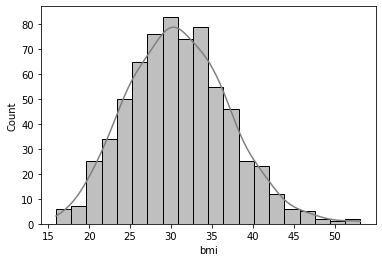

In [224]:
sns.histplot(data=male_bmi,kde=True,color='grey')

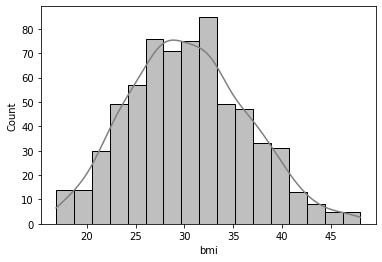

In [225]:
sns.histplot(data=female_bmi,kde=True,color='grey')

Also, from the above BMI histograms, it can be said that the data is normally distributed.

However, it needs to be clarified whether the assumptions of equality of variance are met.
doing this will perform **Bartlett's test** for equality of variance instead of the Levene test since the data are normally distributed.
(detailed explanation to choose suitable test:
https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/)

**Bartlett's Test for variance equality**

H0: The variances are equal across all samples.

Ha: The variances are not equal for at least one pair.

α  = 0.05

In [226]:
alpha = 0.05
stat, p_val = stats.bartlett(male_bmi, female_bmi)
print("Summary Of Bartlett's Equality of Variance Test")
print('\np-value: %.4f' % p_val)
if p_val < alpha:
    print('Reject Null Hypothesis: the variances are not equal for at least one pair.')
else:
    print('Fail to Reject Null Hypothesis: the variances are equal across all samples.')

Summary Of Bartlett's Equality of Variance Test

p-value: 0.6890
Fail to Reject Null Hypothesis: the variances are equal across all samples.


Since the normality and variance equality assumptions were met, **parametric two-sample t-test** can be perform.

### 4. Perform hypothesis testing : Two-Sample T-Test

In [229]:
#Student's Two-Sample t-test
alpha= 0.05
stat, p_val = stats.ttest_ind(male_bmi, female_bmi, alternative='greater',equal_var = True)

print("Summary Of Student's Two-Sample T-Test")
print('\np-value: %.4f' % p_val)


Summary Of Student's Two-Sample T-Test

p-value: 0.0450


### 5. Interpret results

In [230]:
if p_val <alpha:
    print('Reject Null Hypothesis: the BMI of females is statistically different than the BMI of males.')
else:
    print('Fail to Reject Null Hypothesis: the BMI of females and the BMI of males are not statistically different.')

Reject Null Hypothesis: the BMI of females is statistically different than the BMI of males.


# Is the proportion of smokers significantly different in different genders?

It is desired to test how the proportions of smokers differ between the genders.

In [232]:
#calculate the proportions of smokers in genders
number_of_male = df['sex'].value_counts()[0]
number_of_female =df['sex'].value_counts()[1]

male_smokers = df[df['sex']=='male']['smoker'].value_counts()[1] 
female_smokers = df[df['sex']=='female']['smoker'].value_counts()[1]


pm = male_smokers/number_of_male
pf = female_smokers/number_of_female


In [233]:
print(f' Proportion of smokers in males, females = {round(pm,4)*100}%, {round(pf,4)*100}% respectively.')

 Proportion of smokers in males, females = 23.52%, 17.37% respectively.


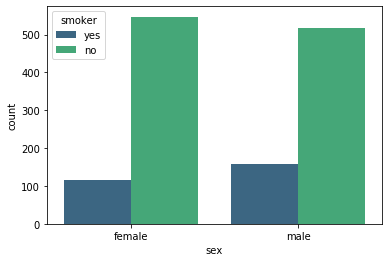

In [234]:
sns.countplot(data=df, x='sex',hue = 'smoker',palette = 'viridis')

### 1.State the null hypothesis and alternative hypothesis

* H0 :  pm  =  pf 

* HA :  pm  !=  pf
    
*pm*  = Male Smokers / Total Male Claimants

*pf*  = Female Smokers / Total Female Claimants

### 2. Decide the type of hypothesis testing

According to the graph above, the proportion of smokers of different genders is different. However, it is desired to test whether the differences are statistically significant. To do this, a proportional **two-sample z-test** will be performed.

### 3. Check the assumptions

**Assumptions Of Two Sample T Test :**
    * Samples data are independent
    * Sufficent sample size (n>30)
 
It is obvious that the two assumptions are met. It will bed used **parametric two-sample z-test**

### 4. Perform hypothesis testing : Two Sample Z Test

In [239]:
# two sample z-test
stat, p_val = proportions_ztest([female_smokers, male_smokers],[number_of_female,number_of_male])
print(f'Statistic: {stat}\np_value: {pval}')


Statistic: -2.7867402154855503
p_value: 0.005324114164320532


### 5. Interpret results

In [240]:
if p_val <alpha:
    print('Reject Null Hypothesis: the proportion of smokers is significantly different in different genders')
else:
    print('Fail to Reject Null Hypothesis: The proportion of smokers is not significantly different in different genders')
    

Reject Null Hypothesis: the proportion of smokers is significantly different in different genders


# Is the distribution of BMI in different region are same ? 

In [241]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [246]:
northwest = df[df['region']=='northwest']
northeast = df[df['region']=='northeast']
southwest = df[df['region']=='southwest']
southeast = df[df['region']=='southeast']

northwest,northeast,southwest,southeast

### 1.State the null hypothesis and alternative hypothesis

H0 : μse = μsw = μne = μnw

HA: At least one of the means are different.
    
* μse = BMI means of claimants from  southeast region

* μsw = BMI means of claimants from  southwest region

* μne = BMI means of claimants from  northeast region

* μnw = BMI means of claimants from  northwest region

### 2. Decide the type of hypothesis testing

A  **One-Way ANOVA Test**  will be used to test whether the mean BMI is the same across the four different regions.

To decide whether to use a parametric or non-parametric test(**One-Way Kruskal–Wallis**), it will be examined whether the assumptions of the **One-Way ANOVA Test** are met. 

### 3. Check the assumptions

**Assumptions of ANOVA**

* All samples involved follow a normal distribution
* All sample have the variance equality
* The samples are randomly selected and independent of one another

**Histogram for normality assumptions**

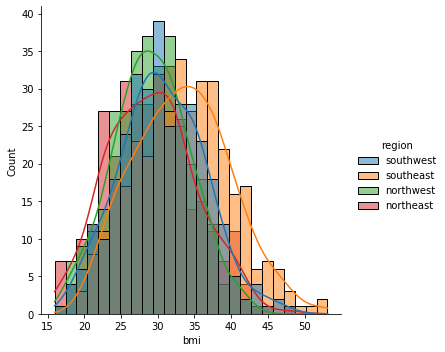

In [179]:
sns.displot(data=df,kde=True,x='bmi',hue='region')

**Box  plot for variance equality assumptions**

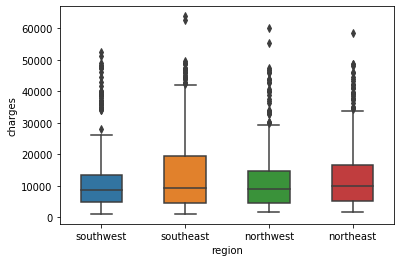

In [253]:
sns.boxplot(x = "region", y = "charges", data = df, width = 0.5)

Visualization techniques were used to check whether the equality of variance and normal distribution assumptions were met.
* According to the distribution graph, it can be said that all groups are normally distributed.
* Based on the box plot, it can be said that all group variances are approximately equal

So it can be performed a parametric One-Way ANOVA Test.

### 4. Perform hypothesis testing : One-Way ANOVA Test

In [254]:
alpha= 0.05
stats.f_oneway(northwest['bmi'],northeast['bmi'],southwest['bmi'],southeast['bmi'])

F_onewayResult(statistic=39.49505720170282, pvalue=1.881838913929143e-24)

### 5. Interpret results

In [255]:
p_val = float('{:.5f}'.format(stats.f_oneway(northwest['bmi'],northeast['bmi'],southwest['bmi'],southeast['bmi'])[1]))
print(p_val)

0.0


In [257]:
if p_val <alpha:
    print('Reject Null Hypothesis:  The mean BMI is significantly different in different regions. At least one of the means is different.')
else:
    print('Fail to Reject Null Hypothesis: The mean  BMI is not significantly different in different regions.')
    

Reject Null Hypothesis:  The mean BMI is significantly different in different regions. At least one of the means is different.


The null hypothesis was rejected, but it is not known which means differs. The Tukey-Kramer HSD test can be used to detect which mean is different.

In [258]:
# Calculate all pairwise comparisons with TukeyHSD confidence intervals
print(pairwise_tukeyhsd(df['bmi'], df['region']))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263    0.9 -1.1552  1.2078  False
northeast southeast   4.1825  0.001   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562  0.001  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594  0.001 -3.9079 -1.6108   True
----------------------------------------------------------


Based on pairwise Tukey-hsd test it's obvious that northest & northwest means are differ.